In [12]:
import numpy as np
import matplotlib.pyplot as plt

## Define Activate Functions

### Sigmoid

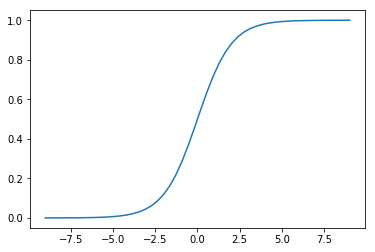

In [13]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

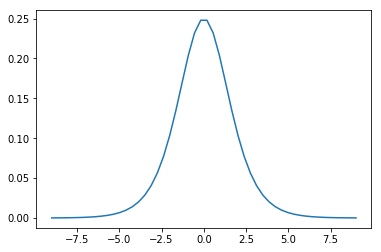

In [14]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### ReLU

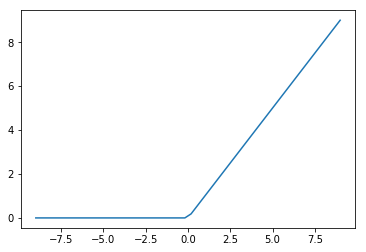

In [15]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu(xx)

plt.plot(xx, yy)

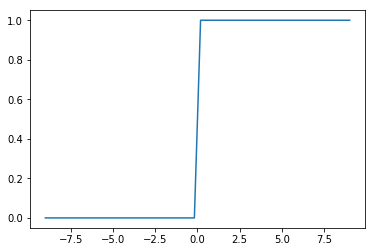

In [16]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu_derivative(xx)

plt.plot(xx, yy)

## Load Dataset

In [19]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [20]:
X = mnist["data"]

print(X.shape)
X

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [21]:
y = mnist["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [22]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y_hot.shape)
y_hot

(1797, 10)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Train

In [61]:
import time

def train_origin(X, y, y_hot, num_epoch, learning_rate, activation, activation_derivative):
    num_input = X.shape[1]
    num_output = y_hot.shape[1]

    w1 = np.random.randn(num_input, 100)
    w2 = np.random.randn(100, 100)
    w3 = np.random.randn(100, num_output)

    history_origin = []

    start = time.time()

    for epoch in range(num_epoch):
        z1 = X.dot(w1)
        a1 = activation(z1)
        z2 = a1.dot(w2)
        a2 = activation(z2)
        z3 = a2.dot(w3)
        a3 = sigmoid(z3)

        y_predict = np.argmax(a3, axis=1)    
        error_origin = (y != y_predict).mean()

        if epoch % 10 == 0:
            print("{0:2} error = {1:.5f}".format(epoch, error_origin))

        end = time.time()
        history_origin.append({
            'time': end - start,
            'error': error_origin
        })

        d3 = a3 - y_hot
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w3 = w3 - learning_rate * a2.T.dot(d3)
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

    end = time.time()
    term_origin = end - start

    return history_origin, error_origin, term_origin

In [62]:
import time

def train(X, y, y_hot, num_epoch, learning_rate, activation, activation_derivative):
    num_input = X.shape[1]
    num_output = y_hot.shape[1]

    w1 = np.random.uniform(low=-np.sqrt(6 / (num_input + 100)), high=np.sqrt(6 / (num_input + 100)), size=(num_input, 100))
    w2 = np.random.uniform(low=-np.sqrt(6 / (100 + 100)), high=np.sqrt(6 / (100 + 100)), size=(100, 100))
    w3 = np.random.uniform(low=-np.sqrt(6 / (100 + num_output)), high=np.sqrt(6 / (100 + 10)), size=(100, num_output))

    history = []

    start = time.time()

    for epoch in range(num_epoch):
        z1 = X.dot(w1)
        a1 = activation(z1)
        z2 = a1.dot(w2)
        a2 = activation(z2)
        z3 = a2.dot(w3)
        a3 = sigmoid(z3)

        y_predict = np.argmax(a3, axis=1)    
        error = (y != y_predict).mean()

        if epoch % 10 == 0:
            print("{0:2} error = {1:.5f}".format(epoch, error))

        end = time.time()
        history.append({
            'time': end - start,
            'error': error
        })

        d3 = a3 - y_hot
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w3 = w3 - learning_rate * a2.T.dot(d3)
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

    end = time.time()
    term = end - start

    return history, error, term

In [63]:
import time

def train2(X, y, y_hot, num_epoch, learning_rate, activation, activation_derivative):
    num_input = X.shape[1]
    num_output = y_hot.shape[1]

    w1 = np.random.uniform(low=-np.sqrt(6 / (num_input)), high=np.sqrt(6 / (num_input)), size=(num_input, 100))
    w2 = np.random.uniform(low=-np.sqrt(6 / (100)), high=np.sqrt(6 / (100)), size=(100, 100))
    w3 = np.random.uniform(low=-np.sqrt(6 / (100)), high=np.sqrt(6 / (100)), size=(100, num_output))

    history2 = []

    start = time.time()

    for epoch in range(num_epoch):
        z1 = X.dot(w1)
        a1 = activation(z1)
        z2 = a1.dot(w2)
        a2 = activation(z2)
        z3 = a2.dot(w3)
        a3 = sigmoid(z3)

        y_predict = np.argmax(a3, axis=1)    
        error2 = (y != y_predict).mean()

        if epoch % 10 == 0:
            print("{0:2} error = {1:.5f}".format(epoch, error2))

        end = time.time()
        history2.append({
            'time': end - start,
            'error': error2
        })

        d3 = a3 - y_hot
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w3 = w3 - learning_rate * a2.T.dot(d3)
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

    end = time.time()
    term2 = end - start

    return history2, error2, term2

### Sigmoid

In [94]:
num_epoch = 100
learning_rate = 0.0003

sigmoid_history_origin, error_origin, term_origin= train_origin(X, y, y_hot, num_epoch, learning_rate,
                                        activation=sigmoid,
                                        activation_derivative=sigmoid_derivative)

print("----" * 10)
print("[sigmoid] term {0:.2f} seconds, error = {1:.5f}".format(term_origin, error_origin))

 0 error = 0.93267
10 error = 0.76572
20 error = 0.45854
30 error = 0.27156
40 error = 0.19533
50 error = 0.17585
60 error = 0.15637
70 error = 0.14747
80 error = 0.12743
90 error = 0.11909
----------------------------------------
[sigmoid] term 14.96 seconds, error = 0.11074


In [95]:
num_epoch = 100
learning_rate = 0.0003

sigmoid_history, error, term= train(X, y, y_hot, num_epoch, learning_rate,
                                        activation=sigmoid,
                                        activation_derivative=sigmoid_derivative)

print("----" * 10)
print("[sigmoid] term {0:.2f} seconds, error = {1:.5f}".format(term, error))

 0 error = 0.89928
10 error = 0.40122
20 error = 0.25153
30 error = 0.23762
40 error = 0.23595
50 error = 0.20646
60 error = 0.17807
70 error = 0.15359
80 error = 0.15582
90 error = 0.14691
----------------------------------------
[sigmoid] term 11.08 seconds, error = 0.14023


In [96]:
num_epoch = 100
learning_rate = 0.0003

sigmoid_history2, error2, term2 = train2(X, y, y_hot, num_epoch, learning_rate,
                                        activation=sigmoid,
                                        activation_derivative=sigmoid_derivative)

print("----" * 10)
print("[sigmoid] term {0:.2f} seconds, error = {1:.5f}".format(term2, error2))

 0 error = 0.92376
10 error = 0.47357
20 error = 0.30551
30 error = 0.26600
40 error = 0.21425
50 error = 0.17919
60 error = 0.15637
70 error = 0.15415
80 error = 0.15081
90 error = 0.14524
----------------------------------------
[sigmoid] term 11.15 seconds, error = 0.14246


### ReLU

In [109]:
num_epoch = 100
learning_rate = 0.00001

relu_history_origin, error_origin, term= train_origin(X, y, y_hot, num_epoch, learning_rate,
                                     activation=relu,
                                     activation_derivative=relu_derivative)

print("----" * 10)
print("[ReLU] term {0:.2f} seconds, error = {1:.5f}".format(term_origin, error_origin))

 0 error = 0.90540
10 error = 0.90095
20 error = 0.90095
30 error = 0.90095
40 error = 0.90095
50 error = 0.90095
60 error = 0.90095
70 error = 0.90095
80 error = 0.90095
90 error = 0.90095
----------------------------------------
[ReLU] term 14.96 seconds, error = 0.90095


In [104]:
num_epoch = 100
learning_rate = 0.00001

relu_history, error, term= train(X, y, y_hot, num_epoch, learning_rate,
                                     activation=relu,
                                     activation_derivative=relu_derivative)

print("----" * 10)
print("[ReLU] term {0:.2f} seconds, error = {1:.5f}".format(term, error))

 0 error = 0.90262
10 error = 0.22204
20 error = 0.13244
30 error = 0.10239
40 error = 0.07958
50 error = 0.06900
60 error = 0.05899
70 error = 0.06177
80 error = 0.05120
90 error = 0.04174
----------------------------------------
[ReLU] term 4.42 seconds, error = 0.03673


In [108]:
num_epoch = 100
learning_rate = 0.00001

relu_history2, error2, term2 = train2(X, y, y_hot, num_epoch, learning_rate,
                                     activation=relu,
                                     activation_derivative=relu_derivative)

print("----" * 10)
print("[ReLU] term {0:.2f} seconds, error = {1:.5f}".format(term2, error2))

 0 error = 0.90039
10 error = 0.34224
20 error = 0.16583
30 error = 0.11185
40 error = 0.09182
50 error = 0.07624
60 error = 0.06233
70 error = 0.05398
80 error = 0.04452
90 error = 0.04062
----------------------------------------
[ReLU] term 4.27 seconds, error = 0.03617


## 시각화

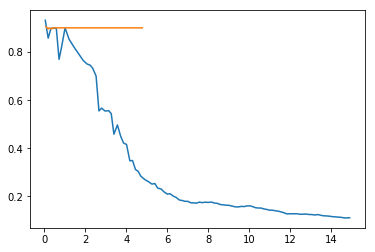

In [110]:
%matplotlib inline
import pandas as pd

sigmoid_history_origin = pd.DataFrame(sigmoid_history_origin)
relu_history_origin = pd.DataFrame(relu_history_origin)

plt.plot(sigmoid_history_origin["time"], sigmoid_history_origin["error"], label="sigmoid")
plt.plot(relu_history_origin["time"], relu_history_origin["error"], label="relu")

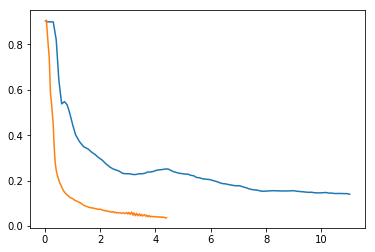

In [111]:
%matplotlib inline
import pandas as pd

sigmoid_history = pd.DataFrame(sigmoid_history)
relu_history = pd.DataFrame(relu_history)

plt.plot(sigmoid_history["time"], sigmoid_history["error"], label="sigmoid")
plt.plot(relu_history["time"], relu_history["error"], label="relu")

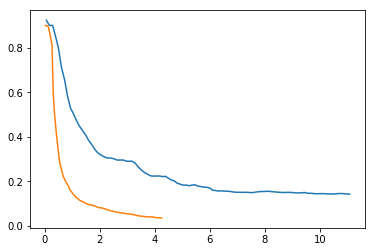

In [112]:
%matplotlib inline
import pandas as pd

sigmoid_history2 = pd.DataFrame(sigmoid_history2)
relu_history2 = pd.DataFrame(relu_history2)

plt.plot(sigmoid_history2["time"], sigmoid_history2["error"], label="sigmoid")
plt.plot(relu_history2["time"], relu_history2["error"], label="relu")